<a href="#Overview"></a>
# Overview
* <a href="#223ea362-681a-4123-a678-d9338baa4d76">Introduction</a>
  * <a href="#f5c03c18-4919-43fc-8947-6a80dc6325a0">Goals</a>
  * <a href="#8b6767f9-d248-4091-95ff-94c668f0cbe2">The data</a>
    * <a href="#e6b2f6f9-a5b4-43b9-b382-b255acf20daf">Function list</a>
  * <a href="#abd39632-8cf7-493f-a78c-4445aabac72c">Setting up the code</a>
  * <a href="#7a9ebc0b-367f-4a36-a24b-aca871771c93">Read in the data</a>
    * <a href="#aa12dc7a-f87c-410e-84ea-d154739e7fd6">Exercise 1: Specifying index labels</a>
    * <a href="#21081b3d-9f22-4001-b28a-7add0324db41">Exercise 2: Extracting single cells</a>
    * <a href="#8c8e6c3a-ad12-4c9f-a597-5314c7e2e426">Exercise 3: Extracting rows</a>
    * <a href="#8c76bcf0-9d8d-4142-83ab-e56d358318a9">Exercise 4: Extracting columns</a>
    * <a href="#48faa491-2c2d-4102-9eff-9ce3ead0ad37">Exercise 5: Parsing date strings in CSV file</a>
    * <a href="#b83adbfb-c0c0-4395-9c2a-52ed8fbb3314">Exercise 6: Reading in ABR threshold data</a>
  * <a href="#c321b1b9-6aef-403f-ba80-3aa61c425045">Calculating ABR threshold shift</a>
    * <a href="#f3a156c2-94d5-496f-8598-8b7c2a91d0f6">Exercise 7: Calculating differences between dates</a>
    * <a href="#b2c5b3ea-38eb-4242-ad75-7f78f335a826">Exercise 8: Calculating means on grouped data</a>
    * <a href="#3706b231-5e94-4bef-a5b4-0204cd6ea4c3">Exercise 9: Making a bar plot</a>
    * <a href="#18241d41-0acc-46c4-9dc8-884da99bd318">Exercise 10: Calculating SEM</a>
    * <a href="#03c026cd-f5dd-4b3e-9443-4e0f26d3d5f7">Exercise 11: Adding errorbars</a>
    * <a href="#26ac2c5a-f133-472b-a434-9c02ce157ee1">Exercise 12: Formatting plots</a>
    * <a href="#7d1f0fb2-f90d-4c86-b7d8-957953d3f449">Exercise 13: Tidy plot labels</a>
    * <a href="#c0409e4f-5af9-4020-8542-87be64fce29d">What next?</a>

<a id="223ea362-681a-4123-a678-d9338baa4d76"></a>
# Introduction
<a href="#Overview">Return to overview</a>

Today's lecture will introduce the very flexible and handy concept of the dataframe, which can be thought of as combining the computational power of a numpy matrix and the intuitive annotation and data flexibility of a spreadsheet. Similar to both numpy matrices and spreadsheets, dataframes are indexed using a `[row, column]` syntax, but row and column labels can be meaningful strings rather than potentially obscure numbers.

<img src="images/01_table_dataframe.svg" width="400">

**Credits:** This notebook is modified from one originally developed by Brad Buran for the 2020 NEUS 642.

<a id="f5c03c18-4919-43fc-8947-6a80dc6325a0"></a>
## Goals
<a href="#Overview">Return to overview</a>

Introduce the idea of a dataframe for managing experimental data in a tabular (spreadsheet) format. Demonstrate how programming using dataframes can simplify many common data operations, including:

1. Reshaping the data.
2. Merging two datasets on a common column or set of columns.
3. Grouping data and computing a statistic on the group.

Dataframes are provided by a Python library called [Pandas](https://pandas.pydata.org/). In the code below, the pandas library is imported as `pd` for short. This two-letter abbreviation is a common convention in scientific Python programming (you'll often see numpy imported as `np` and scipy as `sp`). It should already be installed in your environment. However, if you try to replicate the code using your own Python install, you may have to install Pandas using `conda install pandas`.

<a id="8b6767f9-d248-4091-95ff-94c668f0cbe2"></a>
## The data
<a href="#Overview">Return to overview</a>

Noise exposure can cause hearing damage. Sometimes this damage is temporary, sometimes it's permanent. We can assess hearing thresholds in animals by measuring the auditory brainstem response (ABR). The ABR is an event-related potential reflecting the activity of the auditory nerve in response to a brief tone. By presenting tones of varying loudness (the unit is dB SPL), we can define the animal's hearing threshold as the minimum level (dB SPL) at which we can detect the ABR.

To assess hearing damage caused by noise exposure, we measure ABR thresholds before noise-exposure, one day after noise-exposure and two weeks after noise-exposure. We have data from a set of animals that have been exposed to different levels of noise (104, 110 or 114 dB SPL). In this exercise, we will calculate and plot the mean threshold shift (i.e., the difference between post-exposure ABR threshold and pre-exposure ABR threshold).

The data is saved in two csv files. The first contains the information on the noise-exposure for each animal and the second contains the ABR threshold measurements.

<a id="e6b2f6f9-a5b4-43b9-b382-b255acf20daf"></a>
### Function list
<a href="#Overview">Return to overview</a>

We will introduce a few data manipulation and visualization functions in the `pandas` library. These exercises build on and review some ideas from `numpy` and `matplotlib` introduced in the last notebook.

`pandas` functions (Many of these exist as methods of the `pd.DataFrame` class, in the same way that many numpy functions are methods of numpy arrays.)
* `read_csv`
* `join`
* `groupby`
* `mean`
* `sem`
* `plot`

DataFrame properties (Properties act like variables but are actually generated dynamically in cool ways.)
* `loc`


<a id="abd39632-8cf7-493f-a78c-4445aabac72c"></a>
## Setting up the code
<a href="#Overview">Return to overview</a>

At the beginning of every Python script we need to import the libraries we need and define a few variables.

In [1]:
# This ensures that plots are shown below each code cell
%matplotlib inline

# Import the library we're using for this exercise
import pandas as pd

# For brevity, limit the number of rows displayed
pd.options.display.max_rows = 7

<a id="7a9ebc0b-367f-4a36-a24b-aca871771c93"></a>
## Read in the data
<a href="#Overview">Return to overview</a>

Since Pandas provides a function for reading multiple file formats, including CSV (which can be generated by Excel using `save as`), reading in the exposure data is very simple.

In [2]:
exposure_data = pd.read_csv('exposure_data.csv')
exposure_data

,animal,exposure_date,exposure_level
0,Subject 1,2016-12-27,110
1,Subject 10,2017-04-24,114
2,Subject 11,2017-03-23,114
...,...,...,...
35,Subject 7,2017-05-09,114
36,Subject 8,2017-05-09,114
37,Subject 9,2017-05-09,114


This looks pretty good, but there's a bit of redundancy here. There's one row for each animal. The animals are numbered 1 through 38 as shown by the `animal` column. However, Pandas has automatically created an index indicating the row numbers. All dataframes have an index which uniquely identifies each row. By default, the index is just the row number. Note that the row-numbering starts at 0, which is a typical convention in Python. In some programming languages (e.g., Matlab), numbering typically starts at 1.

A dataframe index does not have to be a simple row number as long as the label for that row is unique. The label can be any immutable value (e.g., a string). Why not just use the animal ID as the index? Is there a way we can tell Pandas to use the `animal` column as the index? Perhaps the `read_csv` function has a parameter that allows you to specify this.  You can look up the documentation for any function in the IPython prompt by putting a question mark, `?`, after the name of the function:

    pd.read_csv?
   
Ok, now try it. What do you get?

In [4]:
# %load "answers/answer_001.txt"
# Answer
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePathOrBuffer',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    encoding_errors: 'str | N

<a id="aa12dc7a-f87c-410e-84ea-d154739e7fd6"></a>
### Exercise 1: Specifying index labels
<a href="#Overview">Return to overview</a>

That's a lot of parameters for `read_csv`! Take a minute to read through the documentation. Does anything sound like it might let us specify what column to use as the index? Now, replace the `...` with the appropriate code to set the `animal` column as the index:

    exposure_data = pd.read_csv('exposure_data.csv', ...)
    exposure_data

Remember that Python uses a zero-based numbering scheme. That means that the first column has an index of 0 and the second column has an index of 1.

As always, once you have figured out the solution, please place a green post-it note on  your computer or give a thumbs-up.

In [7]:
# %load "answers/answer_002.txt"
# Answer
exposure_data = pd.read_csv('exposure_data.csv', index_col='animal')
exposure_data

,exposure_date,exposure_level
animal,,
Subject 1,2016-12-27,110
Subject 10,2017-04-24,114
Subject 11,2017-03-23,114
...,...,...
Subject 7,2017-05-09,114
Subject 8,2017-05-09,114
Subject 9,2017-05-09,114


This looks much better. Why might this be useful? 

Let's discuss some terminology first:

* A `dataframe` is a two-dimensional data structure aligned by rows and columns (i.e., a table). However, unlike Excel, you can specify your own row labels and column labels.

* A `series` is a one-dimensional data structure that has an index. When you extract a single row or column from a dataframe, a series is returned.

Let's take a closer look at this. You can extract a single value from the dataframe using the special `loc` attribute:

    value = dataframe.loc[row_label, column_label]
    
The colon, `:`, is a special symbol that indicates to extract all values for that dimension. To extract an entire row:

    row = dataframe.loc[row_label, :]
    
To extract an entire column:

    column = dataframe.loc[:, column_label]
    
<a id="21081b3d-9f22-4001-b28a-7add0324db41"></a>
### Exercise 2: Extracting single cells
<a href="#Overview">Return to overview</a>

Let's go ahead and try extracting some data from the dataframe. What's the exposure date for Subject 10?   

In [9]:
# %load "answers/answer_003.txt"
# Answer
value = exposure_data.loc['Subject 10', 'exposure_date']
value

'2017-04-24'

<a id="8c8e6c3a-ad12-4c9f-a597-5314c7e2e426"></a>
### Exercise 3: Extracting rows
<a href="#Overview">Return to overview</a>

Now, try and extract the entire *row* for animal 10. How do you do this?

In [11]:
# %load "answers/answer_004.txt"
# Answer
row = exposure_data.loc['Subject 10', :]
row

exposure_date     2017-04-24
exposure_level           114
Name: Subject 10, dtype: object

Remember what we said earlier about the difference between a dataframe and a series. Is `row` a series or a dataframe? If you're ever not sure, you can print the datatype of a variable:

    print(type(row))

Also, note how `row` is indexed. As with dataframes, you can pull out individual elements using the `loc` indexer.

In [12]:
row.loc['exposure_date']

'2017-04-24'

<a id="8c76bcf0-9d8d-4142-83ab-e56d358318a9"></a>
### Exercise 4: Extracting columns
<a href="#Overview">Return to overview</a>

Now, pull out the `exposure_date` column for all animals.

In [14]:
# %load "answers/answer_005.txt"
# Answer
column = exposure_data.loc[:, 'exposure_date']
column

animal
Subject 1     2016-12-27
Subject 10    2017-04-24
Subject 11    2017-03-23
                 ...    
Subject 7     2017-05-09
Subject 8     2017-05-09
Subject 9     2017-05-09
Name: exposure_date, Length: 38, dtype: object

There's a problem. Let's take a closer look at a single value in the `exposure_date` column. 

In [15]:
exposure_data.loc['Subject 10', 'exposure_date']

'2017-04-24'

<a id="48faa491-2c2d-4102-9eff-9ce3ead0ad37"></a>
### Exercise 5: Parsing date strings in CSV file
<a href="#Overview">Return to overview</a>

Note the quotation marks around the value. That means the value is a string. That's not very useful to us. We want the value to be a Python date object. That will allow us to perform date math (such as determine how many days are in between two dates). Let's go back to the `read_csv` function. Is there any way we can have the `read_csv` function parse the date strings into Python date objects for us? Remember how to pull up the documentation for the function.

Go ahead and replace the `...` in the code below to properly parse the date strings for us:

    exposure_data = pd.read_csv('exposure_data.csv', index_col=0, ...)
    exposure_data.loc['Subject 10', 'exposure_date']

In [23]:
# %load "answers/answer_006.txt"
# Answer
exposure_data = pd.read_csv('exposure_data.csv', index_col=0, parse_dates=['exposure_date'])
exposure_data.loc['Subject 10', 'exposure_date']



Timestamp('2017-04-24 00:00:00')

<a id="b83adbfb-c0c0-4395-9c2a-52ed8fbb3314"></a>
### Exercise 6: Reading in ABR threshold data
<a href="#Overview">Return to overview</a>

Now the value is a `Timestamp` instead of a string. That lets us do some very nice date-related math (which we will get to in a little bit). Now write the code to read in the `abr_thresholds.csv` file and save it in a variable called `threshold_data`. This file does not have a single column that can be used as an index. There are ways to make combine multiple columns to form a special type of index known as a hierarchial index (i.e., `MultiIndex` in Pandas terminology). We will save this for a future lecture. For now, let's just have Pandas automatically create a numbered index for us. Dates are stord in the `abr_date` column.

In [30]:
# %load "answers/answer_007.txt"
# Answer
threshold_data = pd.read_csv('abr_thresholds.csv', parse_dates=['abr_date'])
threshold_data

,animal,ear,threshold,abr_date
0,Subject 1,left,40.0,2016-12-24
1,Subject 1,right,30.0,2016-12-24
2,Subject 1,left,35.0,2017-01-10
...,...,...,...,...
187,Subject 38,right,45.0,2015-09-25
188,Subject 38,left,55.0,2015-09-29
189,Subject 38,left,35.0,2015-10-12


In [31]:
type(threshold_data.loc[0,'abr_date'])

pandas._libs.tslibs.timestamps.Timestamp

Now we can merge the ABR data with the exposure data. The goal is to end up with a single dataframe containing both the thresholds and exposure information. 

Remember that `exposure_data` is indexed by the animal ID because each row is data for a unique animal. We can use this index as a lookup value. For each row in `threshold_data`, we want to copy the values in the `exposure_date` and `exposure_level` from the corresponding row in `exposure_data` where the values for `animal` match. Pandas provides a method, `join`, that allows us to do this.

In the image below, the boxes shaded in grey are the row and column labels.

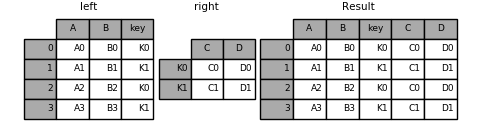

Go ahead and replace the `...` in the code below to join the tables together and store the result as a new variable, `data`:

    data = threshold_data.join(...)
    data

In [115]:
# %load "answers/answer_008.txt"
# Answer
data = threshold_data.join(exposure_data, on=['animal'])
data

,animal,ear,threshold,abr_date,exposure_date,exposure_level
0,Subject 1,left,40.0,2016-12-24,2016-12-27,110
1,Subject 1,right,30.0,2016-12-24,2016-12-27,110
2,Subject 1,left,35.0,2017-01-10,2016-12-27,110
...,...,...,...,...,...,...
187,Subject 38,right,45.0,2015-09-25,2015-09-28,110
188,Subject 38,left,55.0,2015-09-29,2015-09-28,110
189,Subject 38,left,35.0,2015-10-12,2015-09-28,110


Recall that one of the first things we did was load the data using a function called `pd.read_csv`. This function was made available via the pandas module (which we imported as `pd`). Therefore, we can call it using the form:

    module_name.function_name(parameters)

Programming languages consist of data structures and functions. Data structures store data. Functions perform actions on data. Data structures in Python are known as *objects*. Some functions are stand-alone while others are associated with objects. Functions associated with objects are known as *methods*.

Methods are no different than other functions in principle. Objects are designed to help programmers group together related data and functions. We use methods by writing the object's name with a period, followed by the method's name, and any parameters passed to the method in paratheses. Thus, methods are in the form:

    object_name.method_name(parameters)

You can press tab after the period and a list will pop up with the methods associated with that particular object, e.g.:

    threshold_data.<tab>

<a id="c321b1b9-6aef-403f-ba80-3aa61c425045"></a>
## Calculating ABR threshold shift
<a href="#Overview">Return to overview</a>

The next step is to compute when the ABR threshold was measured relative to the exposure. We can do this by subtracting the date of the ABR (stored in the `abr_date` column) from the exposure date (stored in the `exposure_date` column) and saving it as a new column, `days_re_exposure`. 

<a id="f3a156c2-94d5-496f-8598-8b7c2a91d0f6"></a>
### Exercise 7: Calculating differences between dates
<a href="#Overview">Return to overview</a>

Yes, it's as simple as subtracting the two columns. Go ahead and try it. Hint, to create a new column:

    dataframe[column_name] = new_column_data

In [46]:
data.loc[:,'abr_date'] - data.loc[:,'exposure_date']

0     -3 days
1     -3 days
2     14 days
        ...  
187   -3 days
188    1 days
189   14 days
Length: 190, dtype: timedelta64[ns]

In [116]:
# %load "answers/answer_009.txt"
# Answer
data['days_re_exposure'] = data['abr_date'] - data['exposure_date']
type(data['days_re_exposure'][0])

pandas._libs.tslibs.timedeltas.Timedelta

Nice. This is one of the advantages of making sure all your dates are represented properly in Python. It makes date math easy.

Next, we want to calculate the mean threshold for each exposure level before, one day after and 14 days after noise exposure. Pandas makes this easy with the `groupby` method. The method takes a list of columns to group by. Here, we only have one column which we're grouping by to start with.

In [51]:
grouping = data.groupby(['days_re_exposure'])
grouping

You now have a `DataFrameGroupBy` object that remembers how you grouped the data. You can now perform a variety of operations on this grouped data using methods offered by this particular object. For exampe, you can take the mean across all columns.

In [54]:
grouping.median()

,threshold,exposure_level
days_re_exposure,,
-3 days,35.0,110.0
1 days,65.0,110.0
14 days,40.0,110.0


Note that we are missing a bunch of columns. The original dataframe had `animal`, `ear`, `abr_date` and `exposure_date`. Why are they missing?

Typically you just want the mean of a particular column.  You can specify the column you wish to use with the syntax:

    variable_name[column_name].mean()

In [59]:
grouping['threshold'].mean()

days_re_exposure
-3 days    36.176471
1 days     61.800000
14 days    41.854839
Name: threshold, dtype: float64

Is the result above a series or dataframe?

<a id="b2c5b3ea-38eb-4242-ad75-7f78f335a826"></a>
### Exercise 8: Calculating means on grouped data
<a href="#Overview">Return to overview</a>

We'd like to modify the groupby operation so we can calcuate the mean threshold for each exposure level and timepoint (-3, 1, and 14 days re. exposure). 

How would you modify:

    grouping = data.groupby(['days_re_exposure'])
    mean_thresholds = grouping['threshold'].mean()
    
To achieve the requested result? Go ahead and try it?

In [62]:
data.groupby(['exposure_level', 'days_re_exposure'])

In [73]:
# %load "answers/answer_010.txt"
# Answer
grouping = data.groupby(['exposure_level', 'days_re_exposure',])
mean_thresholds = grouping['threshold'].mean()
mean_thresholds

exposure_level  days_re_exposure
104             -3 days             31.666667
                1 days              51.666667
                14 days             39.166667
                                      ...    
114             -3 days             36.666667
                1 days              63.750000
                14 days             39.722222
Name: threshold, Length: 9, dtype: float64

What format is the data in? Dataframe or series? Note that the index has two levels, `exposure_level` and `days_re_exposure`. This is the first time we've encountered a `MultiIndex`. We'll cover these types of indices in more detail next week.

Now that we've calculated the group means, we want to plot the data. Fortunately, Pandas comes with a bunch of built-in plotting methods that makes life easy. Let's go ahead and try them!

<AxesSubplot:xlabel='exposure_level,days_re_exposure'>

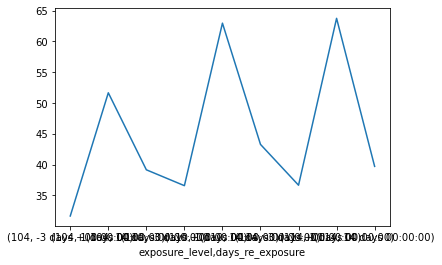

In [74]:
mean_thresholds.plot()

That's not really a very informative plot. We probably want a plot that plots the mean threshold for each `days_re_exposure` with a separate line for each `exposure_level`. How can we figure out what we need to do? The reason why we are getting the plot above is because Pandas, by default, uses the index labels as the x-values and creates a separate line for each column. So, somehow we need to create a separate column for each exposure level. Fortunately, that's really easy to do in Pandas using the `unstack` method, which takes a level of a `MultiIndex` and turns it into columns.

In [75]:
mean_thresholds_unstacked = mean_thresholds.unstack('exposure_level')
mean_thresholds_unstacked

exposure_level,104,110,114
days_re_exposure,,,
-3 days,31.666667,36.590909,36.666667
1 days,51.666667,62.968750,63.750000
14 days,39.166667,43.289474,39.722222


<AxesSubplot:xlabel='days_re_exposure'>

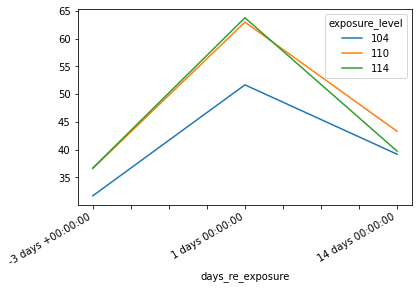

In [76]:
ax = mean_thresholds_unstacked.plot()

<a id="3706b231-5e94-4bef-a5b4-0204cd6ea4c3"></a>
### Exercise 9: Making a bar plot
<a href="#Overview">Return to overview</a>
Looks much better. What if we want to make it a bar plot? What do we need to do? Remember how to look up the documentation for a function  or method? Take a closer look at the `plot` method and see what options it has. You should see some similarity to that matplotlib `plot` function.

In [ ]:
mean_thresholds_unstacked.plot

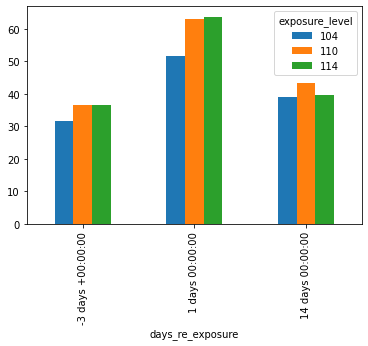

In [79]:
# %load "answers/answer_011.txt"
# Answer
ax = mean_thresholds_unstacked.plot(kind='bar')

Now, we'd like to add some error bars indicating the SEM. To do this, we need to first calculate the SEM for each group. Let's go back to the groupby object we made (`grouping`).

In [81]:
grouping.mean()

threshold
exposure_level days_re_exposure           
104            -3 days           31.666667
               1 days            51.666667
               14 days           39.166667
...                                    ...
114            -3 days           36.666667
               1 days            63.750000
               14 days           39.722222

[9 rows x 1 columns]

Another feature of IPython is that you can look up what types of methods an object has by putting a dot after the variable and hitting the tab key:
    
    variable_name.<tab>
    
Go ahead and try it with `grouping`.

Now, scroll through the list that pops up. Does anything sound like a good candidate for calculating the SEM? How can you verify that it, indeed, will do what you want?

<a id="18241d41-0acc-46c4-9dc8-884da99bd318"></a>
### Exercise 10: Calculating SEM
<a href="#Overview">Return to overview</a>

Great, now calculate the SEM for each `exposure_level` and `days_re_exposure` group. Be sure to reshape the result so that each exposure level is a separate column (i.e., the shape should match that of `mean_thresholds_unstacked`).

In [83]:
# %load "answers/answer_012.txt"
# Answer
sem_thresholds = grouping['threshold'].sem()
sem_thresholds_unstacked = sem_thresholds.unstack('exposure_level')
sem_thresholds_unstacked

exposure_level,104,110,114
days_re_exposure,,,
-3 days,1.666667,0.972300,2.800560
1 days,4.409586,2.043619,3.542224
14 days,2.006932,1.451887,2.156925


In [84]:
mean_thresholds_unstacked

exposure_level,104,110,114
days_re_exposure,,,
-3 days,31.666667,36.590909,36.666667
1 days,51.666667,62.968750,63.750000
14 days,39.166667,43.289474,39.722222


<a id="03c026cd-f5dd-4b3e-9443-4e0f26d3d5f7"></a>
### Exercise 11: Adding errorbars
<a href="#Overview">Return to overview</a>

Since we were careful to ensure that our `sem_thresholds_unstacked` dataframe has an identical index and set of columns as `mean_thresholds_unstacked`, it becomes much easier to add the errorbars using the built-in plotting functionality of Pandas. Go back to the `plot` method you used. Look at the documentation. Is there any way we can pass in the errorbar information to the plotting method? If so, go ahead and try it.

In [92]:
sem_thresholds = grouping['threshold'].sem()
data = pd.DataFrame({'mean': mean_thresholds, 'sem': sem_thresholds})
data.unstack('exposure_level')

mean                             sem            \
exposure_level          104        110        114       104       110   
days_re_exposure                                                        
-3 days           31.666667  36.590909  36.666667  1.666667  0.972300   
1 days            51.666667  62.968750  63.750000  4.409586  2.043619   
14 days           39.166667  43.289474  39.722222  2.006932  1.451887   

                            
exposure_level         114  
days_re_exposure            
-3 days           2.800560  
1 days            3.542224  
14 days           2.156925

<AxesSubplot:xlabel='days_re_exposure'>

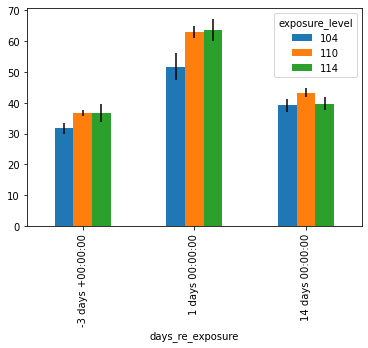

In [93]:
mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)

In [94]:
# %load "answers/answer_013.txt"
# Answer
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)

<a id="26ac2c5a-f133-472b-a434-9c02ce157ee1"></a>
### Exercise 12: Formatting plots
<a href="#Overview">Return to overview</a>

Now, let's fix the X and Y axes. The `plot` method returned what's known as an axes object. This object represents the plot you just generated. Check to see if thre are any useful methods on this object that allow you to set the y and x axes label as well as the x ticklabels. Since there are a ton of methods available, skip ahead to the ones that begin with `set`. You can quickly filter the list by entering the first few letters of the method name you're looking for then hitting `<tab>`:

    ax.set<tab>
    
We'd like to set the x-axis label to "Days re. exposure" and the y-axis label to "Threshold (dB SPL)". The tick labels may also look a bit better if they were simply '-3', '1' and '14'.

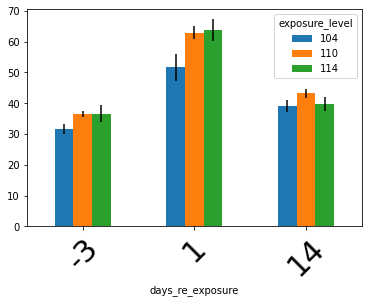

In [109]:
f=ax.figure
type(f)
f


[Text(0, 0, '-3'), Text(1, 0, '1'), Text(2, 0, '14')]

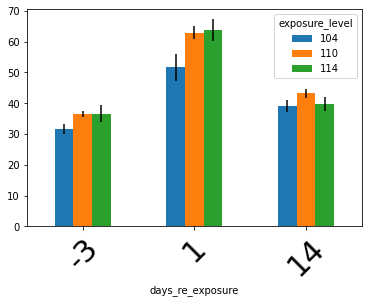

In [103]:
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)

ax.set_xticklabels([-3, 1, 14], rotation=45, fontsize=30)
#ax.set_ylabel
#ax.set_xticklabels

[Text(0, 0, '-3'), Text(1, 0, '1'), Text(2, 0, '14')]

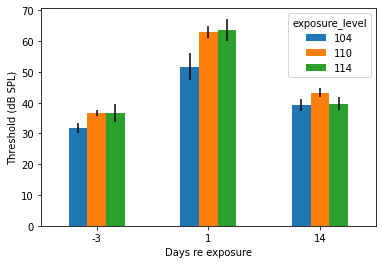

In [112]:
# %load "answers/answer_014.txt"
# Answer
ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)
ax.set_xlabel('Days re exposure')
ax.set_ylabel('Threshold (dB SPL)')
ax.set_xticklabels(['-3', '1', '14'], rotation=0)

<a id="7d1f0fb2-f90d-4c86-b7d8-957953d3f449"></a>
### Exercise 13: Tidy plot labels
<a href="#Overview">Return to overview</a>

This dataset is pretty nicely annotated, but we can alway make the plots easier to read. For example, you might want to remove the clunky computer-ese label `'exposure_level'` from the legend and replace it with something prettier like `'Exposure Level'`.  Look up the method `rename` in data `data`. In a copy of `data`, called `data_relabeled`, rename the `'exposure_level'` column to `'Exposure Level'` and the `'days_re_exposure'` column to `'Days RE Exposure'`.

Note the consequences of a change at this stage of running an analysis. You'll need to recompute mean_thresholds_unstacked and regenerate the same plot as for the previous exercise. This can mostly be accomplished by copying code from above. But what do you have to change to get it to execute properly? What axis label command can you skip now?

In [119]:
data
data_relabeled = data.rename(columns={'exposure_level': 'Exposure Level',
                                      'days_re_exposure': 'Days RE Exposure'})
data_relabeled

,animal,ear,threshold,abr_date,exposure_date,Exposure Level,Days RE Exposure
0,Subject 1,left,40.0,2016-12-24,2016-12-27,110,-3 days
1,Subject 1,right,30.0,2016-12-24,2016-12-27,110,-3 days
2,Subject 1,left,35.0,2017-01-10,2016-12-27,110,14 days
...,...,...,...,...,...,...,...
187,Subject 38,right,45.0,2015-09-25,2015-09-28,110,-3 days
188,Subject 38,left,55.0,2015-09-29,2015-09-28,110,1 days
189,Subject 38,left,35.0,2015-10-12,2015-09-28,110,14 days


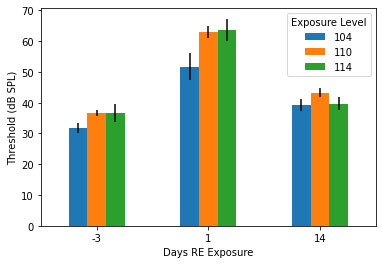

In [121]:
# %load "answers/answer_015.txt"
data_relabeled = data.copy()

# Answer
data_relabeled = data.rename(columns={'exposure_level': 'Exposure Level',
                                      'days_re_exposure': 'Days RE Exposure'})

grouping = data_relabeled.groupby(['Exposure Level', 'Days RE Exposure'])
mean_thresholds = grouping['threshold'].mean()
mean_thresholds_unstacked = mean_thresholds.unstack('Exposure Level')
sem_thresholds = grouping['threshold'].sem()
sem_thresholds_unstacked = sem_thresholds.unstack('Exposure Level')

ax = mean_thresholds_unstacked.plot(kind='bar', yerr=sem_thresholds_unstacked)
#ax.set_xlabel('Days re exposure')
ax.set_ylabel('Threshold (dB SPL)')
ax.set_xticklabels(['-3', '1', '14'], rotation=0);

<a id="c0409e4f-5af9-4020-8542-87be64fce29d"></a>
### What next?
<a href="#Overview">Return to overview</a>

How do you test whether there is a significant difference in threshold between exposure groups?  ... a change over time within groups? ... an interaction between time and group?